                                                                                                                       
# Homework 1: Problem 4a: Single variable linear regression
## Linear Regression with the Boston Housing data   

## Instructions
This file contains code that helps you get started on linear regression. You will need to complete the functions 
in **linear_regressor.py** and **utils.py** in the places indicated. Modify this notebook at the places marked **TODO**. 

You will implement linear regression with one variable to predict the median value of a home in
a census tract in the Boston suburbs from the percentage of the population in the census tract
that is of lower economic status. The file **housing.data.txt** contains the data for our linear
regression problem. We will build a model that predicts the median home value in a census tract
(in $10000s) from the percentage of the population of lower economic status in a tract. This notebook
has already been set up to load this data for you using the Python package pandas. 

## Reading data and plotting
Before starting on any task, it is often useful to understand the data by visualizing it. For this
dataset, you can use a scatter plot to visualize the data, since it has only two features to plot
(percentage of population of lower economic status and median home value). Many other problems
that you will encounter in real life are multi-dimensional and cannot be plotted on a 2-d plot. We have loaded the predictor and predicted variables in X and y. You will see the plot in
Figure 1 generated by plot_utils.py saved in fig1.pdf in the part1 folder.

Reading data ...
Plotting data ...


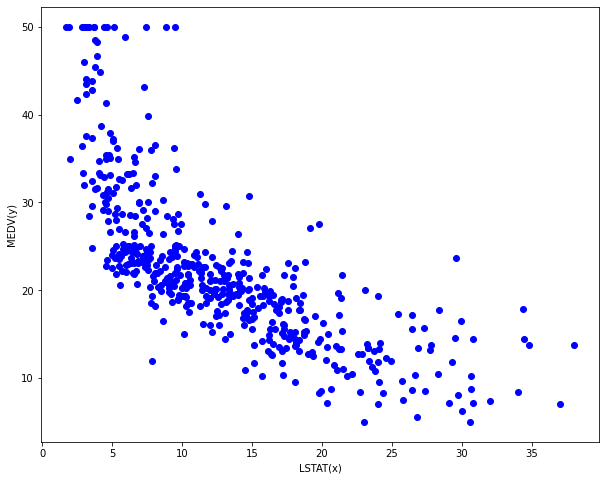

In [7]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2


print('Reading data ...')
bdata = load_boston()
df = pd.DataFrame(data = bdata.data, columns = bdata.feature_names)

#  X is the percentage of the population in a census tract that is of
#  lower economic status. X is a vector of length 506.
#  y is to the median home value in $10000's. y is a vector of length 506

X = df.LSTAT
y = bdata.target

# Scatter plot LSTAT vs median home value, shown interactively or saved in fig1.pdf

import numpy as np
import plot_utils
print('Plotting data ...')
plot_utils.plot_data(X,y,'LSTAT(x)','MEDV(y)')
plt.show()

## Training a univariate model
**Before you run the contents of the cell below**, you will need to implement two functions: one for calcuating the loss $J(\theta)$, and the other to perform gradient descent in the $\theta$ space.
Once you complete these functions, you can
check the convergence of your gradient descent implementation. 
### First, complete the code for the loss method for the LinearReg_SquaredLoss class in the file linear_regressor.py. 
Remember that the variables X and y are not scalar values, but matrices whose rows represent the
examples from the training set. 
### Next, implement gradient descent in the method train for the LinearRegressor class in the file linear_regressor.py. 
The loop structure has been written for you, and you only need
to supply the updates to $\theta$ within each iteration. Recall that we minimize the value of $J(\theta)$ by
changing the values of the vector $\theta$, not by changing X or y. A good way to verify that gradient
descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each
step. The train method calls the loss method on every iteration and prints the cost. Assuming
you have implemented gradient descent and and the loss function correctly, your value of $J(\theta)$
should never increase, and should converge to a steady value by the end of the algorithm. You
should expect to see a cost of approximately 296.07 at the first iteration. After you are finished,
the script below will use your final parameters to plot the linear fit. The result should look something like
Figure 2 in the assignment handout. The plot of the $J(\theta)$ values during gradient descent should resemble the plot in Figure 3 in the assignment handout.

iteration 0 / 10000: loss 296.073458
iteration 1000 / 10000: loss 32.190429
iteration 2000 / 10000: loss 20.410446
iteration 3000 / 10000: loss 19.347011
iteration 4000 / 10000: loss 19.251010
iteration 5000 / 10000: loss 19.242344
iteration 6000 / 10000: loss 19.241561
iteration 7000 / 10000: loss 19.241491
iteration 8000 / 10000: loss 19.241484
iteration 9000 / 10000: loss 19.241484
Theta found by gradient_descent: [34.55363411 -0.95003694]


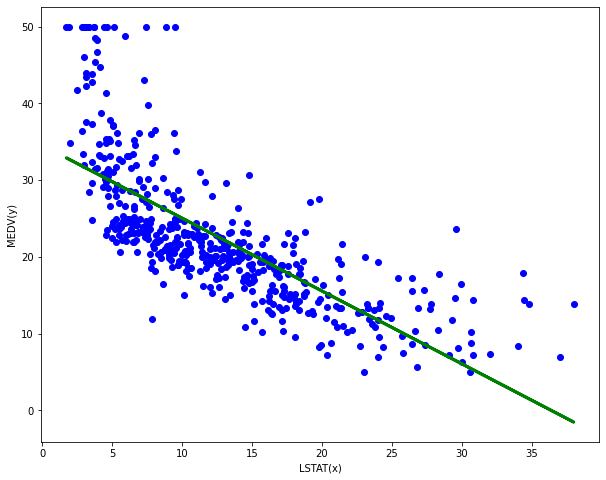

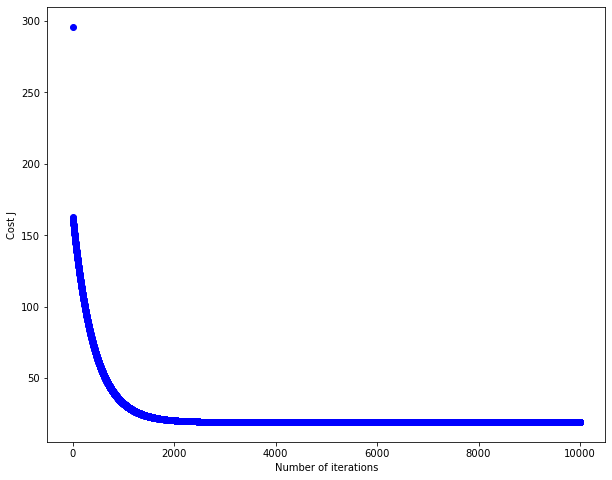

In [8]:
# Predict median home value from percentage of lower economic status in a census tract

# add the column of ones to X to represent the intercept term

XX = np.vstack([np.ones((X.shape[0],)),X]).T

from linear_regressor import LinearRegressor, LinearReg_SquaredLoss

# set up a linear regression model

linear_reg = LinearReg_SquaredLoss()

# run gradient descent

J_history = linear_reg.train(XX,y,learning_rate=0.005,num_iters=10000,verbose=True)

# print the theta found

print('Theta found by gradient_descent: %s' % (linear_reg.theta))

# plot the linear fit and save it in fig2.pdf
plot_utils.plot_data(X,y,'LSTAT(x)','MEDV(y)')
plt.plot(X, np.dot(XX,linear_reg.theta), 'g-',linewidth=3)
plt.show()

# Plot the convergence graph

plot_utils.plot_data(range(len(J_history)),J_history,'Number of iterations','Cost J')
plt.show()


## Qualitative analysis of the linear fit
What can you say about the quality of the linear fit for this data? In your assignment **writeup.pdf**, explain how you expect the model to perform at the low and high ends of values for LSTAT? How could we improve the quality of the fit?

## Predicting on unseen data with the model
Your final values for $\theta$ will also be used to make predictions on median home values for census
tracts where the percentage of the population of lower economic status is 5% and 50%. 
### First,complete the predict method in the LinearRegressor class in linear regression.py. 
Then fill
in code for prediction using the computed $\theta$ at the indicated point in the box below. Report
the predictions of your model in your **writeup.pdf**.

In [9]:
# Predict values for lower status percentage of 5% and 50%
# remember to multiply prediction by 10000 because median value is in 10000s

###########################################################################
#   TODO:                                                                 #
#   Predicted median value of a home with LSTAT = 5%                      #
#   Hint: call the predict method with the appropriate x                  #
#         One line of code expected; replace line pred_cost = 0           #
###########################################################################

pred_cost = 0
pred_cost = linear_reg.predict(np.array([1, 5]))
print('For lower status percentage = 5, we predict a median home value of %.2f' % (pred_cost))

###########################################################################
#   TODO:                                                                 #
#   Predicted median value of a home with LSTAT = 50%                     #
#      One line of code expected, replace pred_cost = 0                   #
###########################################################################
pred_cost = pred_cost = linear_reg.predict(np.array([1, 50]))
print('For lower status percentage = 50, we predict a median home value of %.2f' % (pred_cost))

For lower status percentage = 5, we predict a median home value of 29.80
For lower status percentage = 50, we predict a median home value of -12.95


## Visualizing $J(\theta_0,\theta_1)$
To understand the cost function $J(\theta_0,\theta_1)$ better, we plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$
values. You will not need to code anything new for this part, but you should understand how the
code you have written already is creating these images. In the script below, we calculate $J(\theta_0,\theta_1)$ over a grid of
$(\theta_0,\theta_1)$ values using the loss method that you wrote. The 2-D array of $J(\theta_0,\theta_1)$ values is plotted using
the surf and contour commands of matplotlib. The plots should look something like Figure 4 in the assignment handout.
The purpose of these plots is to show you how $J(\theta_0,\theta_1)$ varies with changes in $\theta_0$ and $\theta_1$. The cost
function is bowl-shaped and has a global minimum. This is easier to see in the contour plot than
in the 3D surface plot. This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient
descent moves closer to this point.

Visualizing J(theta_0, theta_1) ...


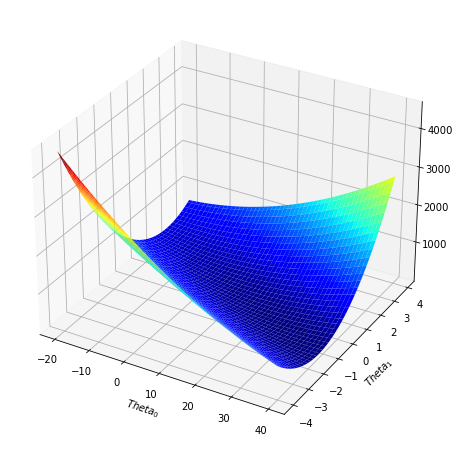

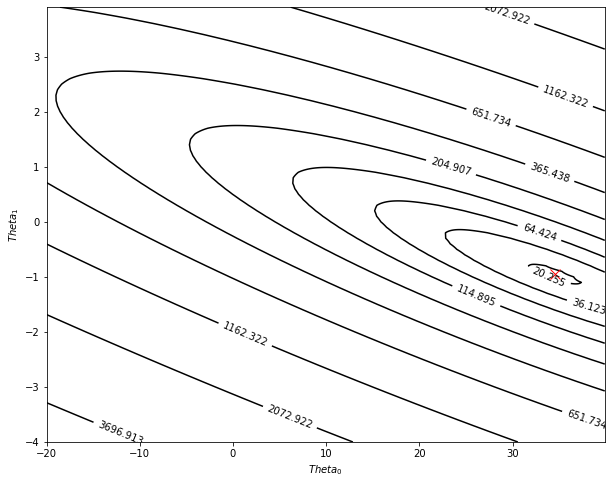

In [10]:
print('Visualizing J(theta_0, theta_1) ...')

# Compute grid over which we will calculate J

theta0_vals = np.arange(-20,40, 0.1);
theta1_vals = np.arange(-4, 4, 0.1);
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

# Fill out J_vals and save plots in fig3a.pdf and fig3b.pdf

linear_reg2 = LinearReg_SquaredLoss()

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        linear_reg2.theta = (theta0_vals[i],theta1_vals[j])
        J_vals[i,j],_ = linear_reg2.loss(XX,y)
          
# Surface and contour plots

# Need to transpose J_vals before calling plot functions

J_vals = J_vals.T
tt1,tt2 = np.meshgrid(theta0_vals,theta1_vals)
plot_utils.make_surface_plot(tt1,tt2,J_vals,'$Theta_0$','$Theta_1$')
#plt.savefig('fig3a.pdf')
plot_utils.make_contour_plot(tt1,tt2,J_vals,np.logspace(-10,40,200),'$Theta_0$','$Theta_1$',linear_reg.theta)
plt.show()
#plt.savefig('fig3b.pdf')

## Comparing with sklearn's linear regression model

In [11]:
# Check if the model you learned using gradient descent matches the one
# that sklearn's linear regression model learns on the same data.

from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(XX,y)

print("The coefficients computed by sklearn: %.2f and %s" % (lr.intercept_, lr.coef_[1]))

The coefficients computed by sklearn: 34.55 and -0.9500493537579912


## Assessing model quality
Up to now, we have used all the data to estimate the model. Then, we check  its performance on two unseen points. To assess model quality in a more systematic fashion, we will explore train/test splits and crossvalidation approaches. We will use the mean squared error and the $R^2$ values as measures of model quality. The lower the mean squared error, the better the model is. The closer $R^2$ is to 1., the better the model is. 

In [12]:
from sklearn import model_selection, metrics

# split X into training and test sets (80/20 split)

X_train,X_test,y_train,y_test = model_selection.train_test_split(XX,y,test_size=0.2)

## =======================  Estimating model on training data ===========()
print('------------- Estimating model on training data -------------')

# set up linear regression model and estimate parameters on training data

lr = LinearReg_SquaredLoss()
J_history = lr.train(XX,y,learning_rate=0.005,num_iters=10000,verbose=True)
print('Theta found by gradient_descent on training data: %s' % (lr.theta))

## ======================= Evaluating model on test data ===============

print('------------- Evaluating model on test data -------------')

def evaluate_model(lr,X_test,y_test):
    y_pred = lr.predict(X_test)
    mse = np.mean((y_pred - y_test) **2)
    print("Residual mean squared error: %.2f" % (mse))
    r_squared = metrics.r2_score(y_test,y_pred)
    print("Variance explained by model: %.2f" % (r_squared))
    return mse, r_squared

mse, r_squared = evaluate_model(lr,X_test,y_test)

# testing quality of a linear model for predicting MEDV from LSTAT using k-fold crossvalidation

print('------------- Estimating/Evaluating model by crossvalidation -------------')
k = 5
kfolds = model_selection.KFold(n_splits=k)

mse,r_squared = np.zeros((k,)), np.zeros((k,))
i = 0
for (train,test) in kfolds.split(XX):
    X_train, X_test, y_train, y_test = XX[train], XX[test], y[train], y[test]
    lr = LinearReg_SquaredLoss()
    J_history = lr.train(X_train,y_train,learning_rate=0.005,num_iters=10000,verbose=True)
    mse[i],r_squared[i] = evaluate_model(lr,X_test,y_test)
    i = i + 1

print ("%d fold cross_validation MSE = %.2f" % (k,np.mean(mse)))
print ("%d fold cross_validation r_squared = %.2f" % (k,np.mean(r_squared)))

------------- Estimating model on training data -------------
iteration 0 / 10000: loss 296.073458
iteration 1000 / 10000: loss 32.190429
iteration 2000 / 10000: loss 20.410446
iteration 3000 / 10000: loss 19.347011
iteration 4000 / 10000: loss 19.251010
iteration 5000 / 10000: loss 19.242344
iteration 6000 / 10000: loss 19.241561
iteration 7000 / 10000: loss 19.241491
iteration 8000 / 10000: loss 19.241484
iteration 9000 / 10000: loss 19.241484
Theta found by gradient_descent on training data: [34.55363411 -0.95003694]
------------- Evaluating model on test data -------------
Residual mean squared error: 46.75
Variance explained by model: 0.47
------------- Estimating/Evaluating model by crossvalidation -------------
iteration 0 / 10000: loss 303.118502
iteration 1000 / 10000: loss 35.238515
iteration 2000 / 10000: loss 22.628279
iteration 3000 / 10000: loss 21.479423
iteration 4000 / 10000: loss 21.374756
iteration 5000 / 10000: loss 21.365220
iteration 6000 / 10000: loss 21.364352
i